In [288]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from datetime import datetime
import warnings
warnings.simplefilter('ignore')

In [289]:
df=pd.read_csv('Accidents0514.csv')

In [290]:
df

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,6,30,0,-1,-1,0,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,3,30,6,2,5,0,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,6,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,12,E09000020,3,3220,6,30,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,21:13,12,E09000020,6,0,6,30,0,-1,-1,0,0,0,7,1,2,0,0,1,1,E01002863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640592,2014984136414,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,07/12/2014,1,22:20,917,S12000006,2,74,3,70,0,-1,-1,0,0,0,6,3,3,0,0,2,1,NaN
1640593,2014984137514,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,11/12/2014,5,06:40,917,S12000006,2,74,3,70,0,-1,-1,0,0,0,6,1,3,0,0,2,1,NaN
1640594,2014984137714,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,09/12/2014,3,02:00,917,S12000006,4,721,6,40,0,-1,-1,0,0,0,4,1,4,0,0,2,1,NaN
1640595,2014984138414,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,17/12/2014,4,06:55,917,S12000006,3,75,6,60,3,4,5,43,0,0,6,2,2,0,0,2,1,NaN


In [291]:
df_accidents=df[['Accident_Index','Accident_Severity','Date','Day_of_Week','Time','Road_Type','Speed_limit','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Urban_or_Rural_Area']]

In [292]:
df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [293]:
df_vehicle=pd.read_csv('Vehicles0514.csv')

In [294]:
df_vehicle.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver',
       'Age_Band_of_Driver', 'Engine_Capacity_(CC)', 'Propulsion_Code',
       'Age_of_Vehicle', 'Driver_IMD_Decile', 'Driver_Home_Area_Type'],
      dtype='object')

In [295]:
df_accidents=pd.merge(df_accidents,df_vehicle,on='Accident_Index',how='left')

In [296]:
df_accidents=df_accidents[['Accident_Index','Accident_Severity','Date','Day_of_Week','Time','Road_Type','Speed_limit','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Urban_or_Rural_Area','Sex_of_Driver','Age_of_Driver','Age_Band_of_Driver']]

In [297]:
df_accidents

,Accident_Index,Accident_Severity,Date,Day_of_Week,Time,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver
0,200501BS00001,2,04/01/2005,3,17:42,6,30,1,2,2,1,2,74,10
1,200501BS00002,3,05/01/2005,4,17:36,3,30,4,1,1,1,1,42,7
2,200501BS00003,3,06/01/2005,5,00:15,6,30,4,1,1,1,1,35,6
3,200501BS00003,3,06/01/2005,5,00:15,6,30,4,1,1,1,1,62,9
4,200501BS00004,3,07/01/2005,6,10:35,6,30,1,1,1,1,2,49,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004420,2014984138414,2,17/12/2014,4,06:55,6,60,6,2,2,2,1,27,6
3004421,2014984138414,2,17/12/2014,4,06:55,6,60,6,2,2,2,1,44,7
3004422,2014984138414,2,17/12/2014,4,06:55,6,60,6,2,2,2,1,73,10
3004423,2014984139614,3,24/12/2014,4,15:00,6,60,1,1,2,2,1,40,7


In [298]:
df

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,6,30,0,-1,-1,0,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,3,30,6,2,5,0,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,6,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,12,E09000020,3,3220,6,30,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,21:13,12,E09000020,6,0,6,30,0,-1,-1,0,0,0,7,1,2,0,0,1,1,E01002863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640592,2014984136414,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,07/12/2014,1,22:20,917,S12000006,2,74,3,70,0,-1,-1,0,0,0,6,3,3,0,0,2,1,NaN
1640593,2014984137514,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,11/12/2014,5,06:40,917,S12000006,2,74,3,70,0,-1,-1,0,0,0,6,1,3,0,0,2,1,NaN
1640594,2014984137714,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,09/12/2014,3,02:00,917,S12000006,4,721,6,40,0,-1,-1,0,0,0,4,1,4,0,0,2,1,NaN
1640595,2014984138414,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,17/12/2014,4,06:55,917,S12000006,3,75,6,60,3,4,5,43,0,0,6,2,2,0,0,2,1,NaN


In [299]:
df_unique_accidents=df_accidents.drop_duplicates('Accident_Index')

In [300]:
df_unique_accidents

,Accident_Index,Accident_Severity,Date,Day_of_Week,Time,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver
0,200501BS00001,2,04/01/2005,3,17:42,6,30,1,2,2,1,2,74,10
1,200501BS00002,3,05/01/2005,4,17:36,3,30,4,1,1,1,1,42,7
2,200501BS00003,3,06/01/2005,5,00:15,6,30,4,1,1,1,1,35,6
4,200501BS00004,3,07/01/2005,6,10:35,6,30,1,1,1,1,2,49,8
5,200501BS00005,3,10/01/2005,2,21:13,6,30,7,1,2,1,1,49,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004415,2014984136414,2,07/12/2014,1,22:20,3,70,6,3,3,2,1,24,5
3004417,2014984137514,3,11/12/2014,5,06:40,3,70,6,1,3,2,1,30,6
3004419,2014984137714,3,09/12/2014,3,02:00,6,40,4,1,4,2,1,21,5
3004420,2014984138414,2,17/12/2014,4,06:55,6,60,6,2,2,2,1,27,6


In [301]:
excel_severity=pd.read_excel('Road-Accident-Safety-Data-Guide.xlsx',sheet_name='Accident Severity',index_col='code')

In [302]:
severity_dict=excel_severity.to_dict().get('label')

In [303]:
day_of_week=pd.read_excel('Road-Accident-Safety-Data-Guide.xlsx',sheet_name='Day of Week',index_col='code')

In [304]:
day_of_week=day_of_week.to_dict().get('label')

In [305]:
day_of_week

{1: 'Sunday',
 2: 'Monday',
 3: 'Tuesday',
 4: 'Wednesday',
 5: 'Thursday',
 6: 'Friday',
 7: 'Saturday'}

In [306]:
road_type=pd.read_excel('Road-Accident-Safety-Data-Guide.xlsx',sheet_name='Road Type',index_col='code')

In [307]:
road_type=road_type.to_dict().get('label')

In [308]:
Light_Conditions=pd.read_excel('Road-Accident-Safety-Data-Guide.xlsx',sheet_name='Light Conditions',index_col='code')

In [309]:
Light_Conditions=Light_Conditions.to_dict().get('label')

In [310]:
Weather_Conditions=pd.read_excel('Road-Accident-Safety-Data-Guide.xlsx',sheet_name='Weather',index_col='code')

In [311]:
Weather_Conditions=Weather_Conditions.to_dict().get('label')

In [312]:
Road_Surface_Conditions=pd.read_excel('Road-Accident-Safety-Data-Guide.xlsx',sheet_name='Road Surface',index_col='code')

In [313]:
Road_Surface_Conditions=Road_Surface_Conditions.to_dict().get('label')

In [314]:
Urban_or_Rural_Area=pd.read_excel('Road-Accident-Safety-Data-Guide.xlsx',sheet_name='Urban Rural',index_col='code')

In [315]:
Urban_or_Rural_Area=Urban_or_Rural_Area.to_dict().get('label')

In [316]:
Sex_of_Driver=pd.read_excel('Road-Accident-Safety-Data-Guide.xlsx',sheet_name='Sex of Driver',index_col='code')

In [317]:
Sex_of_Driver=Sex_of_Driver.to_dict().get('label')

In [318]:
Age_Band_of_Driver=pd.read_excel('Road-Accident-Safety-Data-Guide.xlsx',sheet_name='Age Band',index_col='code')

In [319]:
Age_Band_of_Driver=Age_Band_of_Driver.to_dict().get('label')

In [320]:
df_accidents.head()

,Accident_Index,Accident_Severity,Date,Day_of_Week,Time,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver
0,200501BS00001,2,04/01/2005,3,17:42,6,30,1,2,2,1,2,74,10
1,200501BS00002,3,05/01/2005,4,17:36,3,30,4,1,1,1,1,42,7
2,200501BS00003,3,06/01/2005,5,00:15,6,30,4,1,1,1,1,35,6
3,200501BS00003,3,06/01/2005,5,00:15,6,30,4,1,1,1,1,62,9
4,200501BS00004,3,07/01/2005,6,10:35,6,30,1,1,1,1,2,49,8


In [321]:
df_unique_accidents['Date'][0].replace('/','-')

'04-01-2005'

In [322]:
pd.to_datetime(df_unique_accidents['Date'][0].replace('/','-'))

Timestamp('2005-04-01 00:00:00')

In [323]:
df_unique_accidents['Date'] = df_unique_accidents['Date'].apply(lambda x : x.replace('/','-'))

In [324]:
df_unique_accidents['Date'] = pd.to_datetime(df_unique_accidents['Date'], dayfirst=True)

In [325]:
df_unique_accidents['Date']

0         2005-01-04
1         2005-01-05
2         2005-01-06
4         2005-01-07
5         2005-01-10
             ...    
3004415   2014-12-07
3004417   2014-12-11
3004419   2014-12-09
3004420   2014-12-17
3004423   2014-12-24
Name: Date, Length: 1640597, dtype: datetime64[ns]

In [326]:
df_unique_accidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1640597 entries, 0 to 3004423
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   Accident_Index           1640597 non-null  object        
 1   Accident_Severity        1640597 non-null  int64         
 2   Date                     1640597 non-null  datetime64[ns]
 3   Day_of_Week              1640597 non-null  int64         
 4   Time                     1640464 non-null  object        
 5   Road_Type                1640597 non-null  int64         
 6   Speed_limit              1640597 non-null  int64         
 7   Light_Conditions         1640597 non-null  int64         
 8   Weather_Conditions       1640597 non-null  int64         
 9   Road_Surface_Conditions  1640597 non-null  int64         
 10  Urban_or_Rural_Area      1640597 non-null  int64         
 11  Sex_of_Driver            1640597 non-null  int64         
 12  Age_o

In [327]:
df_unique_accidents['Year'] = df_unique_accidents['Date'].dt.year

In [328]:
df_unique_accidents['Month'] = df_unique_accidents['Date'].dt.month_name()

In [329]:
df_unique_accidents.head()

,Accident_Index,Accident_Severity,Date,Day_of_Week,Time,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Year,Month
0,200501BS00001,2,2005-01-04,3,17:42,6,30,1,2,2,1,2,74,10,2005,January
1,200501BS00002,3,2005-01-05,4,17:36,3,30,4,1,1,1,1,42,7,2005,January
2,200501BS00003,3,2005-01-06,5,00:15,6,30,4,1,1,1,1,35,6,2005,January
4,200501BS00004,3,2005-01-07,6,10:35,6,30,1,1,1,1,2,49,8,2005,January
5,200501BS00005,3,2005-01-10,2,21:13,6,30,7,1,2,1,1,49,8,2005,January


In [330]:
df_unique_accidents['Accident_Severity'] = df_unique_accidents['Accident_Severity'].map(severity_dict)

In [331]:
df_unique_accidents['Day_of_Week'] = df_unique_accidents['Day_of_Week'].map(day_of_week)

In [332]:
df_unique_accidents['Road_Type'] = df_unique_accidents['Road_Type'].map(road_type)

In [333]:
df_unique_accidents['Light_Conditions'] = df_unique_accidents['Light_Conditions'].map(Light_Conditions)

In [334]:
df_unique_accidents['Weather_Conditions'] = df_unique_accidents['Weather_Conditions'].map(Weather_Conditions)

In [335]:
df_unique_accidents['Road_Surface_Conditions'] = df_unique_accidents['Road_Surface_Conditions'].map(Road_Surface_Conditions)

In [336]:
df_unique_accidents['Urban_or_Rural_Area'] = df_unique_accidents['Urban_or_Rural_Area'].map(Urban_or_Rural_Area)

In [337]:
df_unique_accidents['Sex_of_Driver'] = df_unique_accidents['Sex_of_Driver'].map(Sex_of_Driver)

In [338]:
df_unique_accidents['Age_Band_of_Driver'] = df_unique_accidents['Age_Band_of_Driver'].map(Age_Band_of_Driver)

In [339]:
df_unique_accidents

,Accident_Index,Accident_Severity,Date,Day_of_Week,Time,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Year,Month
0,200501BS00001,Serious,2005-01-04,Tuesday,17:42,Single carriageway,30,Daylight,Raining no high winds,Wet or damp,Urban,Female,74,66 - 75,2005,January
1,200501BS00002,Slight,2005-01-05,Wednesday,17:36,Dual carriageway,30,Darkness - lights lit,Fine no high winds,Dry,Urban,Male,42,36 - 45,2005,January
2,200501BS00003,Slight,2005-01-06,Thursday,00:15,Single carriageway,30,Darkness - lights lit,Fine no high winds,Dry,Urban,Male,35,26 - 35,2005,January
4,200501BS00004,Slight,2005-01-07,Friday,10:35,Single carriageway,30,Daylight,Fine no high winds,Dry,Urban,Female,49,46 - 55,2005,January
5,200501BS00005,Slight,2005-01-10,Monday,21:13,Single carriageway,30,Darkness - lighting unknown,Fine no high winds,Wet or damp,Urban,Male,49,46 - 55,2005,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004415,2014984136414,Serious,2014-12-07,Sunday,22:20,Dual carriageway,70,Darkness - no lighting,Snowing no high winds,Snow,Rural,Male,24,21 - 25,2014,December
3004417,2014984137514,Slight,2014-12-11,Thursday,06:40,Dual carriageway,70,Darkness - no lighting,Fine no high winds,Snow,Rural,Male,30,26 - 35,2014,December
3004419,2014984137714,Slight,2014-12-09,Tuesday,02:00,Single carriageway,40,Darkness - lights lit,Fine no high winds,Frost or ice,Rural,Male,21,21 - 25,2014,December
3004420,2014984138414,Serious,2014-12-17,Wednesday,06:55,Single carriageway,60,Darkness - no lighting,Raining no high winds,Wet or damp,Rural,Male,27,26 - 35,2014,December


In [340]:
sev = df_unique_accidents.groupby('Accident_Severity').agg(Number_of_accidents=('Accident_Index','count')).reset_index()

In [341]:
sev['Percentage'] = sev['Number_of_accidents']/sev['Number_of_accidents'].sum()*100

In [342]:
sev

,Accident_Severity,Number_of_accidents,Percentage
0,Fatal,21382,1.303306
1,Serious,222042,13.534220
2,Slight,1397173,85.162474


In [343]:
df_unique_accidents['Date'].min()

Timestamp('2005-01-01 00:00:00')

In [344]:
df_unique_accidents['Date'].max()

Timestamp('2014-12-31 00:00:00')

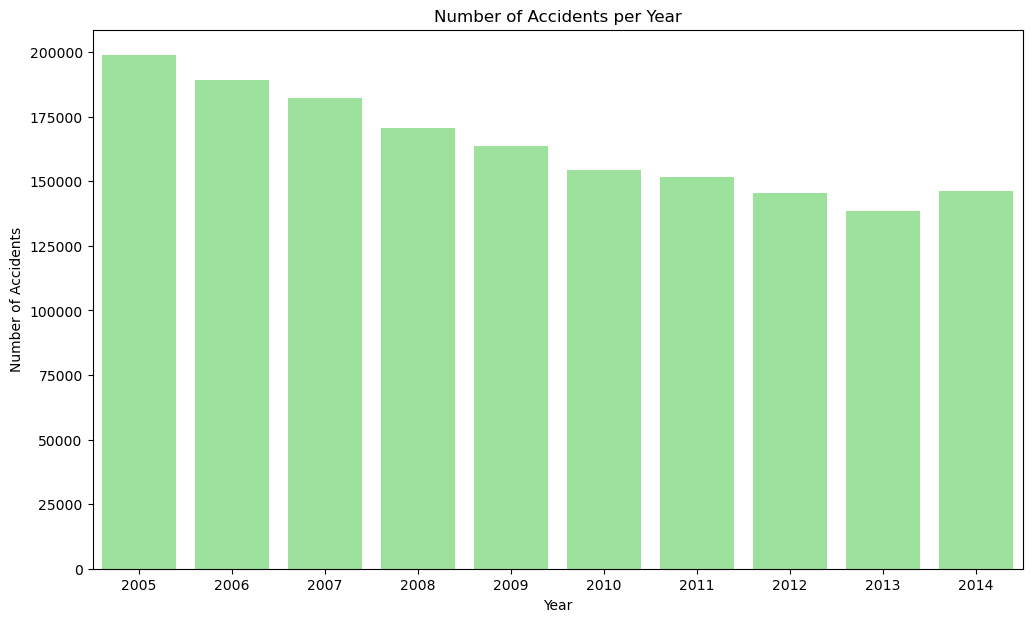

In [345]:
df_unique_accidents.groupby('Year').agg({'Accident_Index':'count'})
ax,fig=plt.subplots(figsize=(12,7))
sns.barplot(data=df_unique_accidents.groupby('Year').agg({'Accident_Index':'count'}),x='Year',y='Accident_Index',color='lightgreen')
plt.title('Number of Accidents per Year')
plt.ylabel('Number of Accidents')
plt.show()

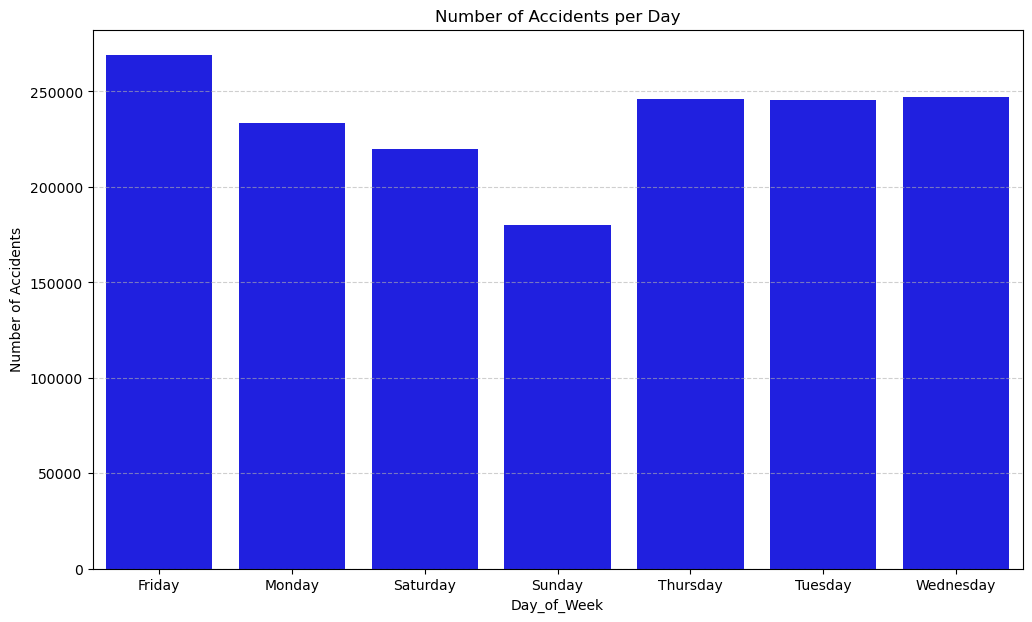

In [346]:
df_unique_accidents.groupby('Day_of_Week').agg({'Accident_Index':'count'})
ax,fig=plt.subplots(figsize=(12,7))
sns.barplot(data=df_unique_accidents.groupby('Day_of_Week').agg({'Accident_Index':'count'}),x='Day_of_Week',y='Accident_Index',color='blue')
plt.title('Number of Accidents per Day')
plt.ylabel('Number of Accidents')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

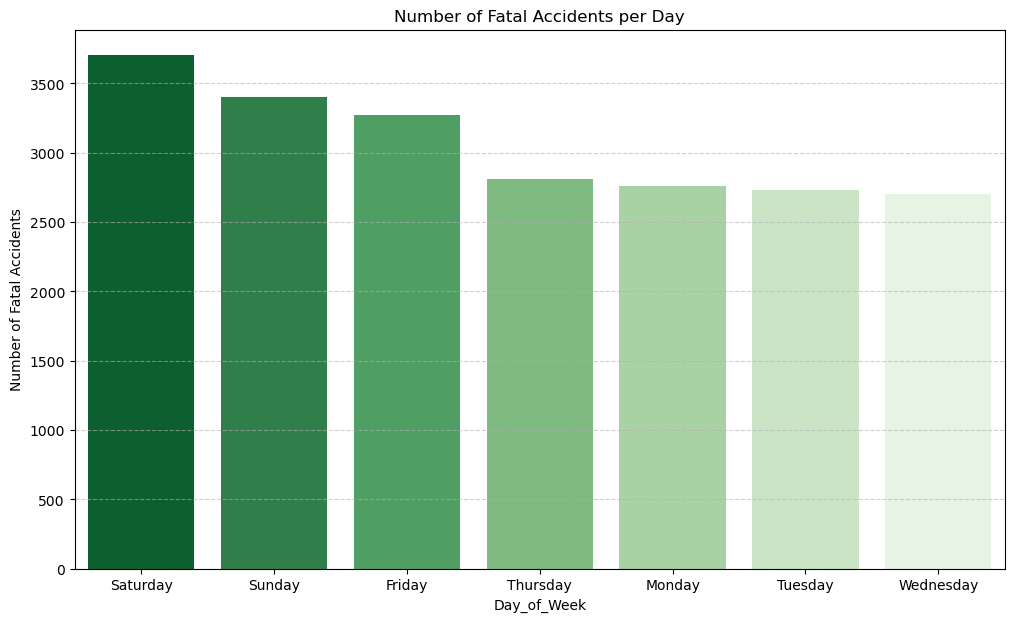

In [347]:
num_fatal_acc = df_unique_accidents[df_unique_accidents['Accident_Severity']=='Fatal'].groupby(['Day_of_Week']).agg({'Accident_Index':'count'}).sort_values('Accident_Index',ascending=False)
ax,fig=plt.subplots(figsize=(12,7))
sns.barplot(data=num_fatal_acc,x='Day_of_Week',y='Accident_Index',palette='Greens_r')
plt.title('Number of Fatal Accidents per Day')
plt.ylabel('Number of Fatal Accidents')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [349]:
df_unique_accidents['Hour'] = df_unique_accidents['Time'].apply(lambda x : str(x).split(':')[0])

In [350]:
df_unique_accidents.dropna(inplace=True)

In [351]:
df_unique_accidents['Hour'] = df_unique_accidents['Hour'].astype(int)

In [352]:
df_unique_accidents['Hour'].unique()

array([17,  0, 10, 21, 12, 20, 22, 16,  5, 11,  9,  3,  7, 13, 18, 15, 23,
        8, 14, 19,  1,  4,  2,  6])

In [353]:
def time_of_day(x):
    if x >= 0 and x<6:
        return 'Night'
    elif x>=6 and x<12:
        return 'Morning'
    elif x>=12 and x<18:
        return 'Afternoon'
    else:
        return 'Evening'

In [354]:
df_unique_accidents['Time_of_day'] = df_unique_accidents['Hour'].apply(time_of_day)

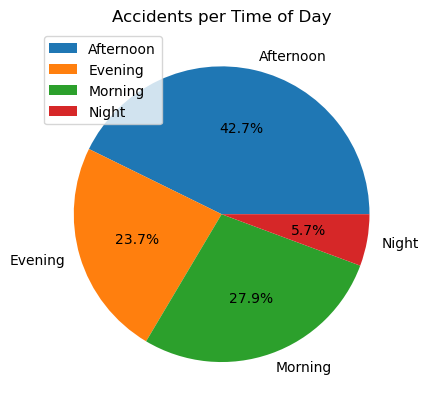

In [355]:
df_unique_accidents.groupby('Time_of_day').agg({'Accident_Index':'count'}).plot.pie(subplots=True,autopct='%1.1f%%')
plt.ylabel('')
plt.title('Accidents per Time of Day')
plt.show()

TypeError: 'Figure' object is not subscriptable

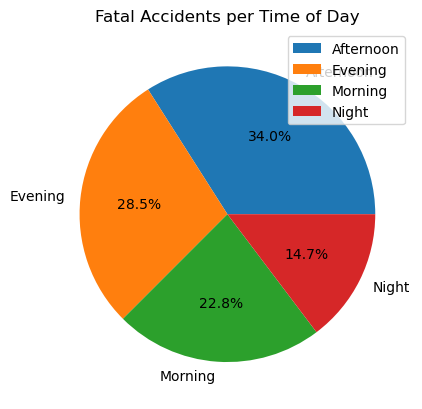

In [356]:
df_unique_accidents[df_unique_accidents['Accident_Severity']=='Fatal'].groupby('Time_of_day').agg({'Accident_Index':'count'}).plot.pie(subplots=True,autopct='%1.1f%%')
plt.ylabel('')
plt.title('Fatal Accidents per Time of Day')
ax[0].legend().remove()
plt.show()

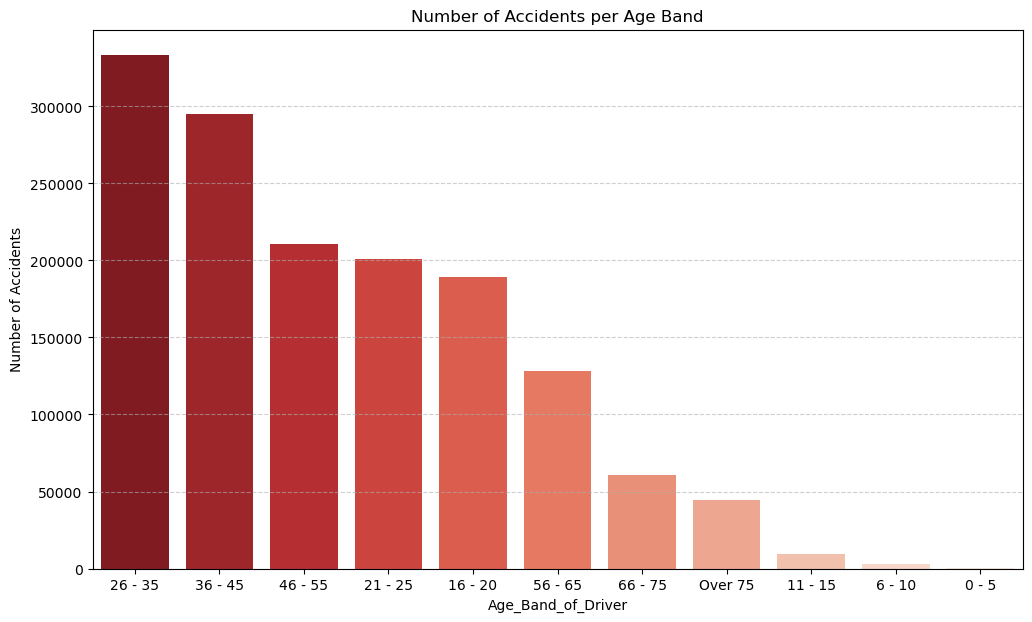

In [357]:
age_band_acc = df_unique_accidents[df_unique_accidents['Age_Band_of_Driver'] != 'Data missing or out of range'].groupby('Age_Band_of_Driver').agg({'Accident_Index':'count'}).sort_values('Accident_Index',ascending=False)
ax,fig=plt.subplots(figsize=(12,7))
sns.barplot(data=age_band_acc,x='Age_Band_of_Driver',y='Accident_Index',palette='Reds_r')
plt.title('Number of Accidents per Age Band')
plt.ylabel('Number of Accidents')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

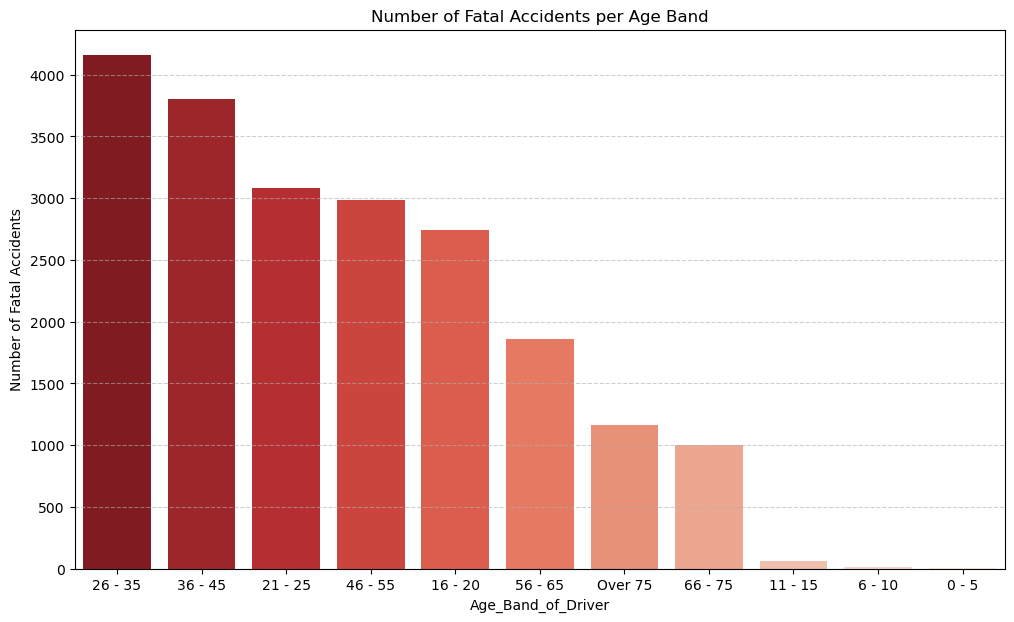

In [358]:
age_band_acc_fatal = df_unique_accidents[(df_unique_accidents['Age_Band_of_Driver'] != 'Data missing or out of range') & (df_unique_accidents['Accident_Severity']=='Fatal')].groupby('Age_Band_of_Driver').agg({'Accident_Index':'count'}).sort_values('Accident_Index',ascending=False)
ax,fig=plt.subplots(figsize=(12,7))
sns.barplot(data=age_band_acc_fatal,x='Age_Band_of_Driver',y='Accident_Index',palette='Reds_r')
plt.title('Number of Fatal Accidents per Age Band')
plt.ylabel('Number of Fatal Accidents')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

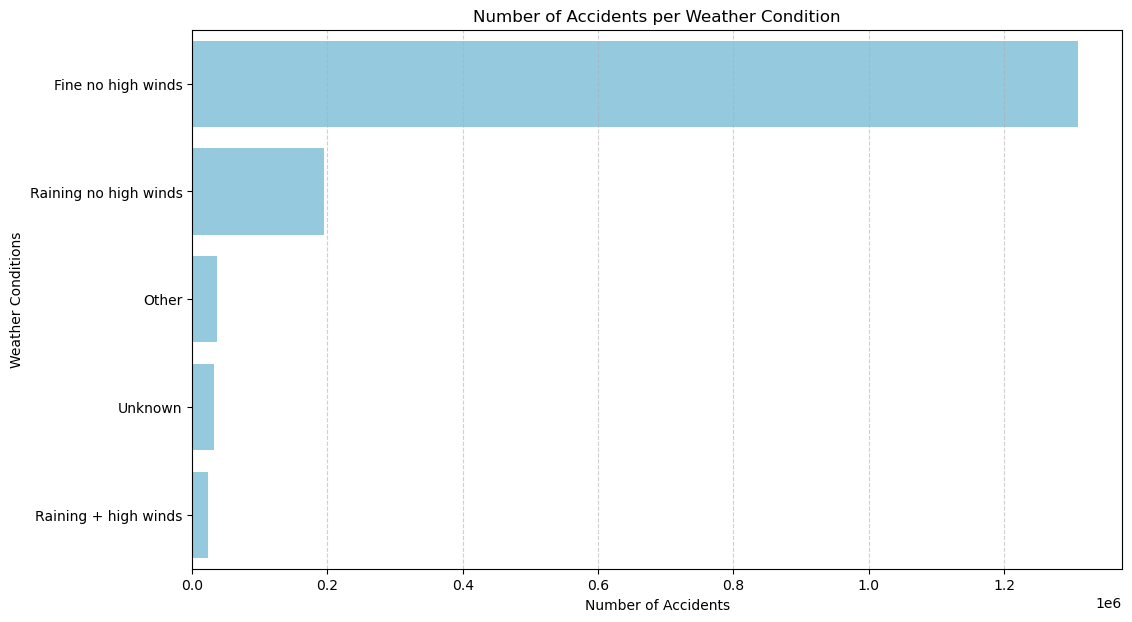

In [359]:
data = df_unique_accidents.groupby(['Weather_Conditions']).agg({'Accident_Index':'count'}).sort_values('Accident_Index',ascending=False).head(5)
ax,fig=plt.subplots(figsize=(12,7))
sns.barplot(data=data,x='Accident_Index',y='Weather_Conditions',color='skyblue',orient='h')
plt.title('Number of Accidents per Weather Condition')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Conditions')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

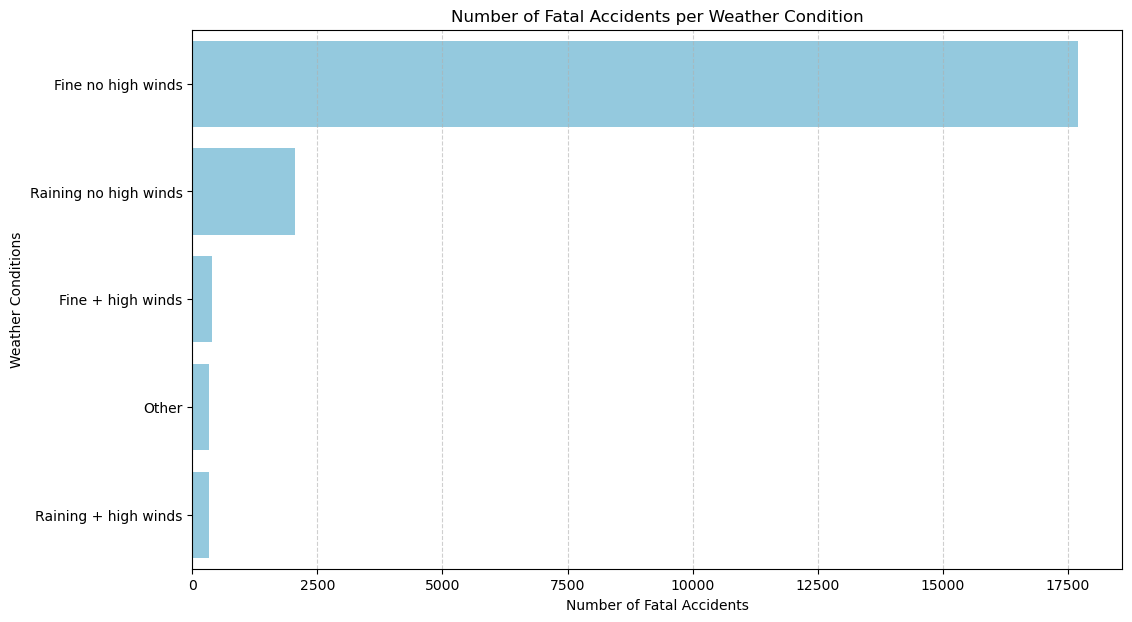

In [360]:
data = df_unique_accidents[df_unique_accidents['Accident_Severity']=='Fatal'].groupby(['Weather_Conditions']).agg({'Accident_Index':'count'}).sort_values('Accident_Index',ascending=False).head(5)
ax,fig=plt.subplots(figsize=(12,7))
sns.barplot(data=data,x='Accident_Index',y='Weather_Conditions',color='skyblue',orient='h')
plt.title('Number of Fatal Accidents per Weather Condition')
plt.xlabel('Number of Fatal Accidents')
plt.ylabel('Weather Conditions')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

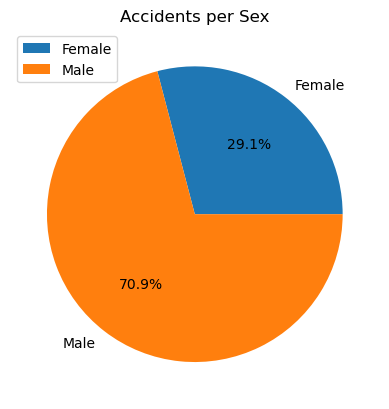

In [361]:
df_unique_accidents[(df_unique_accidents['Sex_of_Driver'] != 'Not known') & (df_unique_accidents['Sex_of_Driver'] != 'Data missing or out of range')].groupby('Sex_of_Driver').agg({'Accident_Index':'count'}).plot.pie(subplots=True,autopct='%1.1f%%')
plt.ylabel('')
plt.title('Accidents per Sex')
plt.show()